In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from collections import Counter
import re
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

라이브러리 불러오기

In [2]:
data = pd.read_csv('./유통데이터/GS_sales_total.csv')

데이터 불러오기

In [3]:
data.head()

,OPER_DT,BOR_CD,ADMD_CD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20180401,1111,11110515,73.7%,27.9%,30.0%,33.5%,1.6%,5.4%,0.0%,1.3%,0.4%
1,20180401,1111,11110530,125.8%,23.7%,25.8%,35.0%,4.6%,9.3%,0.5%,0.2%,0.9%
2,20180401,1111,11110540,67.4%,25.4%,24.7%,32.4%,6.5%,9.0%,NaN,1.3%,0.7%
3,20180401,1111,11110550,101.1%,41.6%,21.8%,28.3%,2.7%,3.7%,0.6%,1.2%,0.2%
4,20180401,1111,11110560,101.3%,31.1%,26.7%,26.2%,1.5%,13.5%,NaN,0.7%,0.2%


In [4]:
data.describe(include = 'all')

,OPER_DT,BOR_CD,ADMD_CD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
count,1.312500e+04,13125.000000,1.312500e+04,13125,13125,13125,13125,13093,13123,12075,12886,12543
unique,NaN,NaN,NaN,1786,438,374,425,155,252,82,81,52
top,NaN,NaN,NaN,86.7%,31.0%,19.5%,34.3%,1.9%,3.9%,0.4%,0.6%,0.2%
freq,NaN,NaN,NaN,35,107,170,123,467,338,1436,986,2542
mean,2.018314e+07,1123.666514,1.123729e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.059328e+03,11.981932,1.198296e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.018040e+07,1111.000000,1.111052e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.018070e+07,1111.000000,1.111062e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.018093e+07,1135.000000,1.135056e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.018123e+07,1135.000000,1.135062e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
OPER_DT      13125 non-null int64
BOR_CD       13125 non-null int64
ADMD_CD      13125 non-null int64
AMT_IND      13125 non-null object
LCLS_10_P    13125 non-null object
LCLS_20_P    13125 non-null object
LCLS_30_P    13125 non-null object
LCLS_40_P    13093 non-null object
LCLS_50_P    13123 non-null object
LCLS_60_P    12075 non-null object
LCLS_70_P    12886 non-null object
LCLS_80_P    12543 non-null object
dtypes: int64(3), object(9)
memory usage: 1.2+ MB


In [6]:
data.isnull().sum()

OPER_DT         0
BOR_CD          0
ADMD_CD         0
AMT_IND         0
LCLS_10_P       0
LCLS_20_P       0
LCLS_30_P       0
LCLS_40_P      32
LCLS_50_P       2
LCLS_60_P    1050
LCLS_70_P     239
LCLS_80_P     582
dtype: int64

In [7]:
data = data.fillna("-0.012345%")

결측치 임시로 채우기

In [8]:
data['AMT_IND'] = [i.split("%")[0] for i in data['AMT_IND']]
data['LCLS_10_P'] = [i.split("%")[0] for i in data['LCLS_10_P']]
data['LCLS_20_P'] = [i.split("%")[0] for i in data['LCLS_20_P']]
data['LCLS_30_P'] = [i.split("%")[0] for i in data['LCLS_30_P']]
data['LCLS_40_P'] = [i.split("%")[0] for i in data['LCLS_40_P']]
data['LCLS_50_P'] = [i.split("%")[0] for i in data['LCLS_50_P']]
data['LCLS_60_P'] = [i.split("%")[0] for i in data['LCLS_60_P']]
data['LCLS_70_P'] = [i.split("%")[0] for i in data['LCLS_70_P']]
data['LCLS_80_P'] = [i.split("%")[0] for i in data['LCLS_80_P']]

In [9]:
data['AMT_IND'] = pd.to_numeric(data['AMT_IND'])
data['LCLS_10_P'] = pd.to_numeric(data['LCLS_10_P'])
data['LCLS_20_P'] = pd.to_numeric(data['LCLS_20_P'])
data['LCLS_30_P'] = pd.to_numeric(data['LCLS_30_P'])
data['LCLS_40_P'] = pd.to_numeric(data['LCLS_40_P'])
data['LCLS_50_P'] = pd.to_numeric(data['LCLS_50_P'])
data['LCLS_60_P'] = pd.to_numeric(data['LCLS_60_P'])
data['LCLS_70_P'] = pd.to_numeric(data['LCLS_70_P'])
data['LCLS_80_P'] = pd.to_numeric(data['LCLS_80_P'])

숫자로 다루기위해 데이터 가공

In [10]:
data.head()

,OPER_DT,BOR_CD,ADMD_CD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20180401,1111,11110515,73.7,27.9,30.0,33.5,1.6,5.4,0.000000,1.3,0.4
1,20180401,1111,11110530,125.8,23.7,25.8,35.0,4.6,9.3,0.500000,0.2,0.9
2,20180401,1111,11110540,67.4,25.4,24.7,32.4,6.5,9.0,-0.012345,1.3,0.7
3,20180401,1111,11110550,101.1,41.6,21.8,28.3,2.7,3.7,0.600000,1.2,0.2
4,20180401,1111,11110560,101.3,31.1,26.7,26.2,1.5,13.5,-0.012345,0.7,0.2


In [11]:
data[data['LCLS_60_P']==-0.012345]

,OPER_DT,BOR_CD,ADMD_CD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
2,20180401,1111,11110540,67.4,25.4,24.7,32.4,6.500000,9.0,-0.012345,1.300000,0.700000
4,20180401,1111,11110560,101.3,31.1,26.7,26.2,1.500000,13.5,-0.012345,0.700000,0.200000
14,20180401,1111,11110690,28.5,15.0,34.7,45.7,0.200000,0.6,-0.012345,3.700000,0.200000
38,20180402,1111,11110540,78.6,19.5,26.9,39.6,2.300000,6.5,-0.012345,5.000000,0.100000
42,20180402,1111,11110580,78.0,34.8,17.7,30.7,7.400000,8.2,-0.012345,0.800000,0.300000
50,20180402,1111,11110690,62.0,26.5,21.2,45.5,0.300000,6.1,-0.012345,-0.012345,0.400000
62,20180402,1135,11350624,74.2,29.6,21.6,42.5,1.700000,3.3,-0.012345,0.600000,0.800000
69,20180402,1135,11350700,122.4,28.1,25.5,33.8,2.900000,6.9,-0.012345,1.100000,1.700000
76,20180403,1111,11110560,62.7,31.3,26.0,31.9,4.200000,6.3,-0.012345,0.300000,0.100000
78,20180403,1111,11110580,82.8,31.8,16.9,30.9,10.500000,7.8,-0.012345,1.900000,0.100000


In [12]:
data = data.drop('BOR_CD', axis =1)

In [13]:
def checkStrange(x):
    data_sample = data[data[x]==-0.012345].drop(['OPER_DT','ADMD_CD','AMT_IND',x],axis=1)
    for j in range(len(data_sample)):
        check = True
        for i in data_sample.keys():
            if data_sample[i].iloc[j]==-0.012345:
                check = False
                break
        if check == True:
            data[x].iloc[data_sample.iloc[j].name] = (100-(data_sample.iloc[j].sum(axis=0))).round(2)

결측치가 1개인경우 채우기

In [14]:
checkStrange("LCLS_40_P")
checkStrange("LCLS_50_P")
checkStrange("LCLS_60_P")
checkStrange("LCLS_70_P")
checkStrange("LCLS_80_P")

In [15]:
print(data[data["LCLS_40_P"]==-0.012345]["LCLS_40_P"].count())
print(data[data["LCLS_50_P"]==-0.012345]["LCLS_50_P"].count())
print(data[data["LCLS_60_P"]==-0.012345]["LCLS_60_P"].count())
print(data[data["LCLS_70_P"]==-0.012345]["LCLS_70_P"].count())
print(data[data["LCLS_80_P"]==-0.012345]["LCLS_80_P"].count())

26
2
267
140
193


남은 결측치가 많지 않음

In [16]:
data.rename(columns={'OPER_DT': 'Day',
                  'ADMD_CD': 'Location', 'AMT_IND':'Amount',
                  'LCLS_10_P': 'meal', 'LCLS_20_P':'Snack',
                  'LCLS_30_P': 'Drink', 'LCLS_40_P':'Home & Living',
                  'LCLS_50_P': 'Health & Beauty', 'LCLS_60_P':'Hobby & Leisure',
                  'LCLS_70_P': 'Social Activities', 'LCLS_80_P':'Pregnancy & Parenting',}, inplace=True)

In [ ]:
가독성을 위해 컬럼명 수정

In [17]:
data.head()

,Day,Location,Amount,meal,Snack,Drink,Home & Living,Health & Beauty,Hobby & Leisure,Social Activities,Pregnancy & Parenting
0,20180401,11110515,73.7,27.9,30.0,33.5,1.6,5.4,0.0,1.3,0.4
1,20180401,11110530,125.8,23.7,25.8,35.0,4.6,9.3,0.5,0.2,0.9
2,20180401,11110540,67.4,25.4,24.7,32.4,6.5,9.0,0.0,1.3,0.7
3,20180401,11110550,101.1,41.6,21.8,28.3,2.7,3.7,0.6,1.2,0.2
4,20180401,11110560,101.3,31.1,26.7,26.2,1.5,13.5,0.1,0.7,0.2


In [19]:
data['Location'].nunique()

36

In [20]:
array=data['Location'].unique()

In [21]:
data_Amount_Category =[]
for i in array:
    data_Amount_Category.append(data[data['Location']==i])

지역별로 카테고리 매출 저장

In [22]:
data_Amount_Category[0]

,Day,Location,Amount,meal,Snack,Drink,Home & Living,Health & Beauty,Hobby & Leisure,Social Activities,Pregnancy & Parenting
0,20180401,11110515,73.7,27.9,30.0,33.5,1.6,5.4,0.0,1.3,0.4
36,20180402,11110515,86.4,27.0,24.6,40.5,3.7,3.1,0.1,0.3,0.7
72,20180403,11110515,72.2,31.8,24.7,36.1,1.2,5.0,0.5,0.5,0.2
108,20180404,11110515,71.7,34.0,22.2,35.5,3.2,3.9,0.2,0.6,0.5
144,20180405,11110515,60.7,38.1,24.3,28.7,2.2,5.2,0.6,0.9,0.1
180,20180406,11110515,72.1,31.3,24.1,33.6,2.1,7.3,0.5,0.9,0.3
216,20180407,11110515,72.8,31.5,25.2,33.9,1.4,4.6,0.6,2.3,0.5
252,20180408,11110515,72.1,30.2,24.4,25.9,1.5,16.3,0.2,0.9,0.6
288,20180409,11110515,71.2,32.9,25.1,34.4,2.7,3.3,0.1,1.4,0.1
324,20180410,11110515,78.1,31.0,22.5,35.2,2.0,7.7,0.2,0.7,0.8


In [25]:
# read files
weather_allFiles1 = glob.glob('./환경기상데이터/노원구/*')
weather_allFiles2 = glob.glob('./환경기상데이터/종로구/*')
allFiles = weather_allFiles1 + weather_allFiles2
w = []

for f in allFiles:
    temp = pd.read_csv(f)
    w.append(temp)

weather = pd.concat(w)

모든 기상파일 합침

In [26]:
weather.drop(['flag', 'co2', 'vocs', 'noise',
              'temp', 'humi', 'Unnamed: 10'], axis = 1, inplace=True)
weather.head()

,tm,serial,pm10,pm25
0,201805070000,V10O1610102,-999,NaN
1,201805070001,V10O1610102,-999,NaN
2,201805070002,V10O1610102,-999,NaN
3,201805070003,V10O1610102,-999,NaN
4,201805070004,V10O1610102,-999,NaN


In [27]:
weather.dtypes

tm          int64
serial     object
pm10        int64
pm25      float64
dtype: object

In [28]:
weather = weather[weather['pm10'] != -999]
weather['tm'] = weather['tm'] // 10000
weather.head()

,tm,serial,pm10,pm25
1064,20180507,V10O1610102,73,24.0
1294,20180507,V10O1610102,100,46.0
1295,20180507,V10O1610102,100,46.0
1296,20180507,V10O1610102,92,42.0
1297,20180507,V10O1610102,99,45.0


이상치 제거

In [29]:
# 계층적 인덱스를 사용하지 않아서 reset_index() 로 인덱스를 칼럼으로 변환
# groupby serial & tm and average
weather = weather.groupby(['tm', 'serial']).mean().reset_index()

In [30]:
# serial number 를 행정동코드로 바꾼다.
weather.replace('V10O1610252',11110615, inplace = True)
weather.replace('V10O1610546',11110615, inplace = True)
weather.replace('V10O1610540',11110615, inplace = True)
weather.replace('V10O1610542',11110615, inplace = True)
weather.replace('V10O1610543',11110615, inplace = True)
weather.replace('V10O1610544',11110615, inplace = True)
weather.replace('V10O1610545',11110615, inplace = True)
weather.replace('V10O1610567',11110615, inplace = True)
weather.replace('V01o1610468',11110530, inplace = True)
weather.replace('V10O1611289',999, inplace = True)
weather.replace('V10O1611172',11110530, inplace = True)
weather.replace('V10O1611634',11110600, inplace = True)
weather.replace('V10O1611887',999, inplace = True)
weather.replace('V10O1611639',11110630, inplace = True)
weather.replace('V10O1611658',11110640, inplace = True)
weather.replace('V10O1612113',11110615, inplace = True)
weather.replace('V10O1611151',11110670, inplace = True)
weather.replace('V10O1611145',11110615, inplace = True)
weather.replace('V10O1611623',11110650, inplace = True)
weather.replace('V10O1611750',11110615, inplace = True)
weather.replace('V10O1611170',11110550, inplace = True)
weather.replace('V10O1611684',11110615, inplace = True)
weather.replace('V10O1611220',11110670, inplace = True)
weather.replace('V10O1612106',11110710, inplace = True)
weather.replace('V10O1611251',11110690, inplace = True)
weather.replace('V10O1611173',11110615, inplace = True)
weather.replace('V10O1611258',11110560, inplace = True)
weather.replace('V10O1611255',11110515, inplace = True)
weather.replace('V10O1611698',11110600, inplace = True)
weather.replace('V10O1611722',11110600, inplace = True)
weather.replace('V10O1611645',11110650, inplace = True)
weather.replace('V10O1610610',11350611, inplace = True)
weather.replace('V10O1610376',11350695, inplace = True)
weather.replace('V10O1610293',11350720, inplace = True)
weather.replace('V10O1610356',11350630, inplace = True)
weather.replace('V10O1610616',11350640, inplace = True)
weather.replace('V10O1610200',11350640, inplace = True)
weather.replace('V10O1610643',11350580, inplace = True)
weather.replace('V10O1610642',11350600, inplace = True)
weather.replace('V10O1610297',11350670, inplace = True)
weather.replace('V10O1610312',11350640, inplace = True)
weather.replace('V10O1610102',11350611, inplace = True)
weather.replace('V10O1610351',11350695, inplace = True)
weather.replace('V10O1610629',11350595, inplace = True)
weather.replace('V10O1610630',11350595, inplace = True)
weather.replace('V10O1611104',11350695, inplace = True)
weather.replace('V10O1611097',11350625, inplace = True)
weather.replace('V10O1611100',11350640, inplace = True)
weather.replace('V10O1612126',11350619, inplace = True)
weather.replace('V10O1611102',11350670, inplace = True)
weather.replace('V10O1611652',11350600, inplace = True)
weather.replace('V10O1611150',11350665, inplace = True)
weather.replace('V10O1611229',11350560, inplace = True)

In [31]:
# 유통:종합테이블과 컬럼명을 맞춰준다.
weather.rename(columns = {'serial':'ADMD_CD'}, inplace = True)

In [32]:
weather.drop(weather[weather['ADMD_CD']==999].index, axis=0, inplace = True)

결측치제거

In [33]:
weather.drop('ADMD_CD',axis=1)
weather_pm = weather.groupby('tm')['pm10','pm25'].mean()

pm_high_date=[]
pm_middle_date=[]
pm_low_date=[]
for i in data['Day'].unique():
    if weather_pm.loc[i]['pm10'] > 80 or weather_pm.loc[i]['pm25'] > 35:
        pm_high_date.append(i)
    elif weather_pm.loc[i]['pm10'] < 30 and weather_pm.loc[i]['pm25'] < 15:
        pm_low_date.append(i)
    else : pm_middle_date.append(i)
        

미세먼지 나쁨, 보통, 좋음구분

In [34]:
##주말 날짜 구분
weekend_data = data.groupby('Day')['Amount'].mean()
weekdata_index = list(weekend_data.index)

weekend_data_saturday = []
weekend_data_sunday = []

for i in range(53):  #토요일
    weekend_data_saturday.append(weekdata_index[0+(7*i)])
for i in range(52): #일요일
    weekend_data_sunday.append(weekdata_index[6+(7*i)])
weekend_date = [] #토요일+일요일
for i in weekend_data_saturday:
    weekend_date.append(i)
for i in weekend_data_sunday:
    weekend_date.append(i)
weekend_date.sort()

weekend_amount=[]
for i in weekend_date:
    weekend_amount.append(data[data['Day']==i].groupby('Day')['Amount'].mean())
    
weekend_amount= pd.concat(weekend_amount)
df = pd.DataFrame(list(weekend_amount.index), columns=['Day'])
df["Amount"] = list(weekend_amount)

holiday = [20180505, 20180507, 20180522, 20180606, 20180613, 20180815,
          20180923, 20180924, 20180925, 20180926, 20181003, 20181009, 20181225,
          20190101, 20190204, 20190205, 20190206, 20190301]
holiday_amount=[]
for i in holiday:
    holiday_amount.append(data[data['Day']==i].groupby('Day')['Amount'].mean())
holiday_amount= pd.concat(holiday_amount)
df_holi = pd.DataFrame(list(holiday_amount.index), columns=['Day'])
df_holi["Amount"] = list(holiday_amount)


weekend_date_copy = weekend_date
for i in holiday:
    weekend_date_copy.append(i)
total_holiday = list(set(weekend_date_copy))
total_holiday.sort()

weekday=list(data['Day'].unique())
for i in total_holiday:
    weekday.remove(i)

휴일 구분

In [35]:
date_amt = data.groupby('Day')['Amount'].mean()

In [36]:
pm_high_date_amt = []
pm_middle_date_amt = []
pm_low_date_amt = []

for i in pm_high_date:
    pm_high_date_amt.append([i,date_amt.loc[i]])
for i in pm_middle_date:
    pm_middle_date_amt.append([i,date_amt.loc[i]])
for i in pm_low_date:
    pm_low_date_amt.append([i,date_amt.loc[i]])

In [37]:
pm_high_date_amt = pd.DataFrame(pm_high_date_amt, columns = ['Day', 'Amt'])
pm_middle_date_amt = pd.DataFrame(pm_middle_date_amt,columns = ['Day', 'Amt'])
pm_low_date_amt = pd.DataFrame(pm_low_date_amt,columns = ['Day', 'Amt'])

미세먼지에 따른 매출량 데이터프레임 만들기

In [38]:
month= [20180401,20180501,20180601,20180701,20180801,20180901,20181001,20181101,20181201,20190101,20190201,20190301,20190401]

<BarContainer object of 1 artists>

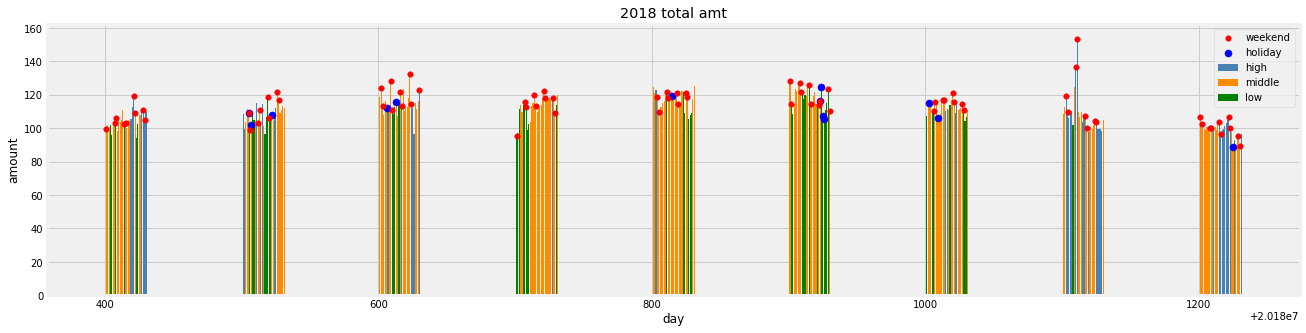

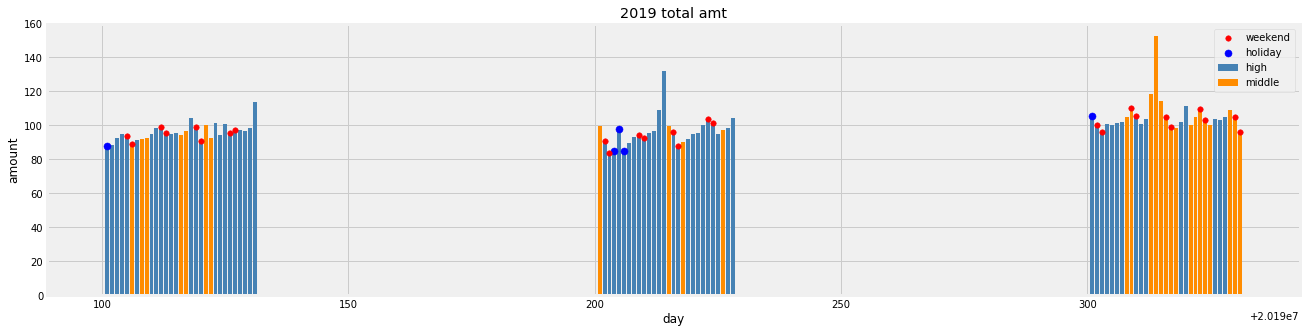

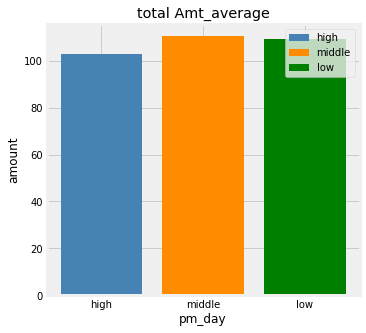

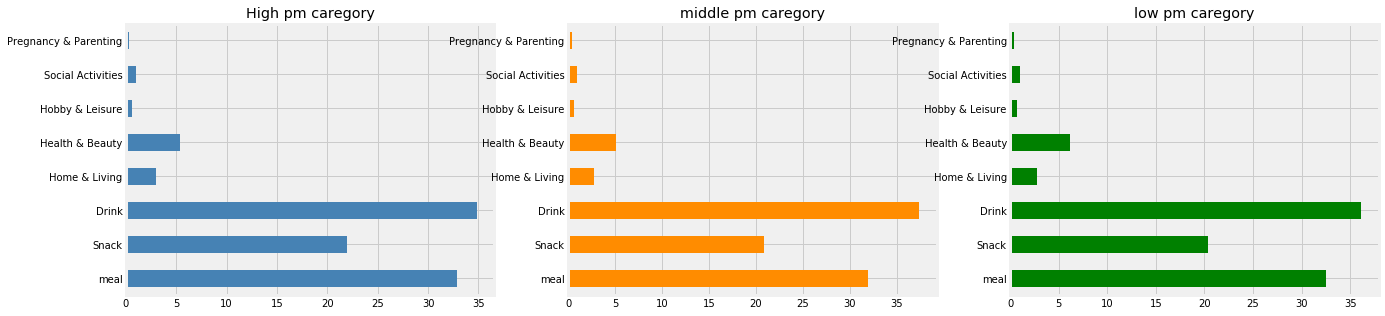

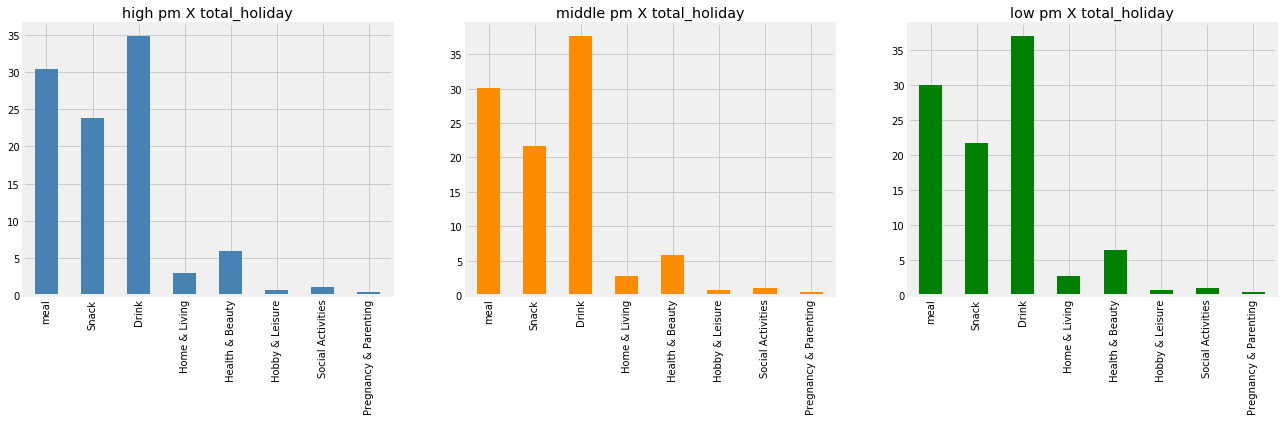

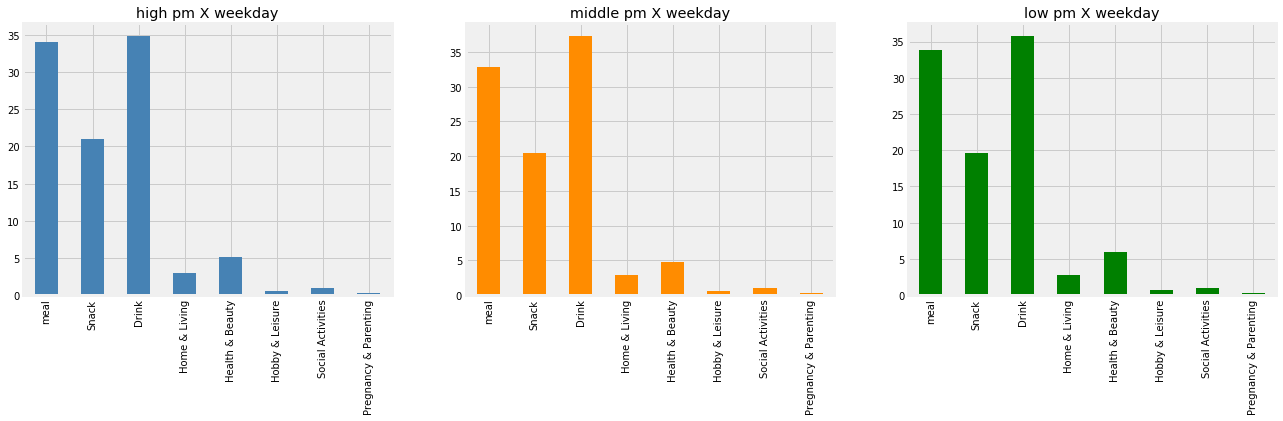

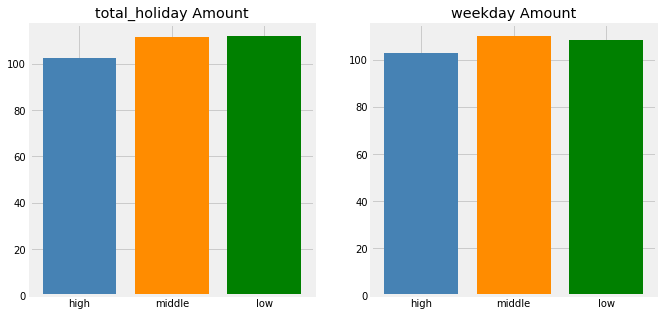

In [40]:
pm_high_month = pm_high_date_amt
pm_middle_month = pm_middle_date_amt
pm_low_month = pm_low_date_amt

pm_high_month_1 = pm_high_date_amt[(pm_high_date_amt['Day']<month[9])]
pm_middle_month_1 = pm_middle_date_amt[(pm_middle_date_amt['Day']<month[9])]
pm_low_month_1 = pm_low_date_amt[(pm_low_date_amt['Day']<month[9])]

pm_high_month_2 = pm_high_date_amt[pm_high_date_amt['Day']>=month[9]]
pm_middle_month_2 = pm_middle_date_amt[pm_middle_date_amt['Day']>=month[9]]
pm_low_month_2 = pm_low_date_amt[pm_low_date_amt['Day']>=month[9]]

plt.figure(figsize=(20,5))
plt.bar(pm_high_month_1['Day'], pm_high_month_1['Amt'], color = 'steelblue')
plt.bar(pm_middle_month_1['Day'],pm_middle_month_1['Amt'], color = 'darkorange')
plt.bar(pm_low_month_1['Day'],pm_low_month_1['Amt'], color = 'g')
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2018 total amt')
plt.scatter(df[(df['Day']<month[9])]['Day'],
            df[(df['Day']<month[9])]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi[(df_holi['Day']<month[9])]['Day'],
            df_holi[(df_holi['Day']<month[9])]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle', 'low'])

plt.figure(figsize=(20,5))
plt.bar(pm_high_month_2['Day'], pm_high_month_2['Amt'], color = 'steelblue')
plt.bar(pm_middle_month_2['Day'],pm_middle_month_2['Amt'], color = 'darkorange')
plt.bar(pm_low_month_2['Day'],pm_low_month_2['Amt'], color = 'g')
plt.xlabel('day')
plt.ylabel('amount')
plt.title('2019 total amt')
plt.scatter(df[df['Day']>=month[9]]['Day'],
            df[df['Day']>=month[9]]['Amount'], color='r',s=30, zorder=10)
plt.scatter(df_holi[df_holi['Day']>=month[9]]['Day'],
            df_holi[df_holi['Day']>=month[9]]['Amount'], color='b',s=50,zorder=9)
plt.legend(['weekend','holiday','high', 'middle'])

plt.figure(figsize=(5,5))
plt.bar('high',pm_high_month['Amt'].mean(), color = 'steelblue')
plt.bar('middle',pm_middle_month['Amt'].mean(), color = 'darkorange')
plt.bar('low',pm_low_month['Amt'].mean(), color = 'g')
plt.legend(['high', 'middle', 'low'])
plt.xlabel('pm_day')
plt.ylabel('amount')
plt.title('total Amt_average')


high_MCT_CAT_CD=[]
middle_MCT_CAT_CD=[]
low_MCT_CAT_CD=[]

a=[]
for i in pm_high_month['Day']:    
    a.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
a=pd.concat(a)

b=[]
for i in pm_middle_month['Day']:    
    b.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
b=pd.concat(b)

c=[]
for i in pm_low_month['Day']:    
    c.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
c=pd.concat(c)


high_MCT=[]
middle_MCT=[]
low_MCT=[]
high_MCT_code=[]
middle_MCT_code=[]
low_MCT_code=[]
for i in range(len(high_MCT_CAT_CD)):
    high_MCT.append(high_MCT_CAT_CD[i,1])
    high_MCT_code.append(str(int(high_MCT_CAT_CD[i,0])))
for i in range(len(middle_MCT_CAT_CD)):
    middle_MCT.append(middle_MCT_CAT_CD[i,1])
    middle_MCT_code.append(str(int(middle_MCT_CAT_CD[i,0])))   
for i in range(len(low_MCT_CAT_CD)):
    low_MCT.append(low_MCT_CAT_CD[i,1])
    low_MCT_code.append(str(int(low_MCT_CAT_CD[i,0])))
    
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
a.mean().plot.barh( color = 'steelblue')
plt.title("High pm caregory")
plt.subplot(1,3,2)
b.mean().plot.barh( color = 'darkorange')
plt.title("middle pm caregory")
plt.subplot(1,3,3)
c.mean().plot.barh( color = 'g')
plt.title("low pm caregory")

pm_high_holiday = []
pm_middle_holiday = []
pm_low_holiday = []
pm_high_holiday_amt = []
pm_middle_holiday_amt = []
pm_low_holiday_amt = []

for i in total_holiday:
    if i in list(pm_high_month['Day']):
        pm_high_holiday.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
        pm_high_holiday_amt.append(data[data['Day']==i].groupby('Day')['Amount'].mean())
    elif i in list(pm_middle_month['Day']):
        pm_middle_holiday.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
        pm_middle_holiday_amt.append(data[data['Day']==i].groupby('Day')['Amount'].mean()) 
    elif i in list(pm_low_month['Day']):
        pm_low_holiday.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
        pm_low_holiday_amt.append(data[data['Day']==i].groupby('Day')['Amount'].mean())    

pm_high_holiday=pd.concat(pm_high_holiday)
pm_middle_holiday=pd.concat(pm_middle_holiday)        
pm_low_holiday=pd.concat(pm_low_holiday)   
pm_high_holiday_amt=pd.concat(pm_high_holiday_amt)
pm_middle_holiday_amt=pd.concat(pm_middle_holiday_amt)        
pm_low_holiday_amt=pd.concat(pm_low_holiday_amt)   

pm_high_weekday = []
pm_middle_weekday = []
pm_low_weekday = []
pm_high_weekday_amt = []
pm_middle_weekday_amt = []
pm_low_weekday_amt = []

for i in weekday:
    if i in list(pm_high_month['Day']):
        pm_high_weekday.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
        pm_high_weekday_amt.append(data[data['Day']==i].groupby('Day')['Amount'].mean())
    elif i in list(pm_middle_month['Day']):
        pm_middle_weekday.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
        pm_middle_weekday_amt.append(data[data['Day']==i].groupby('Day')['Amount'].mean()) 
    elif i in list(pm_low_month['Day']):
        pm_low_weekday.append(data[data['Day']==i].groupby('Day')['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting'].mean())
        pm_low_weekday_amt.append(data[data['Day']==i].groupby('Day')['Amount'].mean())    

pm_high_weekday=pd.concat(pm_high_weekday)
pm_middle_weekday=pd.concat(pm_middle_weekday)        
pm_low_weekday=pd.concat(pm_low_weekday)   
pm_high_weekday_amt=pd.concat(pm_high_weekday_amt)
pm_middle_weekday_amt=pd.concat(pm_middle_weekday_amt)        
pm_low_weekday_amt=pd.concat(pm_low_weekday_amt)   


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("high pm X total_holiday")
pm_high_holiday.mean().plot.bar(color = 'steelblue')
plt.subplot(1,3,2)
plt.title("middle pm X total_holiday")
pm_middle_holiday.mean().plot.bar(color = 'darkorange')
plt.subplot(1,3,3)
plt.title("low pm X total_holiday")
pm_low_holiday.mean().plot.bar(color = 'g')
                                  
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("high pm X weekday")
pm_high_weekday.mean().plot.bar(color = 'steelblue')
plt.subplot(1,3,2)
plt.title("middle pm X weekday")
pm_middle_weekday.mean().plot.bar(color = 'darkorange')
plt.subplot(1,3,3)
plt.title("low pm X weekday")
pm_low_weekday.mean().plot.bar(color = 'g')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("total_holiday Amount")
plt.bar('high',pm_high_holiday_amt.mean(),color = 'steelblue' )
plt.bar('middle',pm_middle_holiday_amt.mean(),color = 'darkorange' )
plt.bar('low',pm_low_holiday_amt.mean(),color = 'g' )
plt.subplot(1,2,2)
plt.title("weekday Amount")
plt.bar('high',pm_high_weekday_amt.mean(),color = 'steelblue' )
plt.bar('middle',pm_middle_weekday_amt.mean(),color = 'darkorange' )
plt.bar('low',pm_low_weekday_amt.mean(),color = 'g' )
                                  

미세먼지에따른 매출총량, 카테고리별 매출, 평일/휴일매출 시각화

In [41]:
category_list = ['meal', 'Snack', 'Drink', 'Home & Living', 'Health & Beauty', 'Hobby & Leisure', 'Social Activities', 'Pregnancy & Parenting']

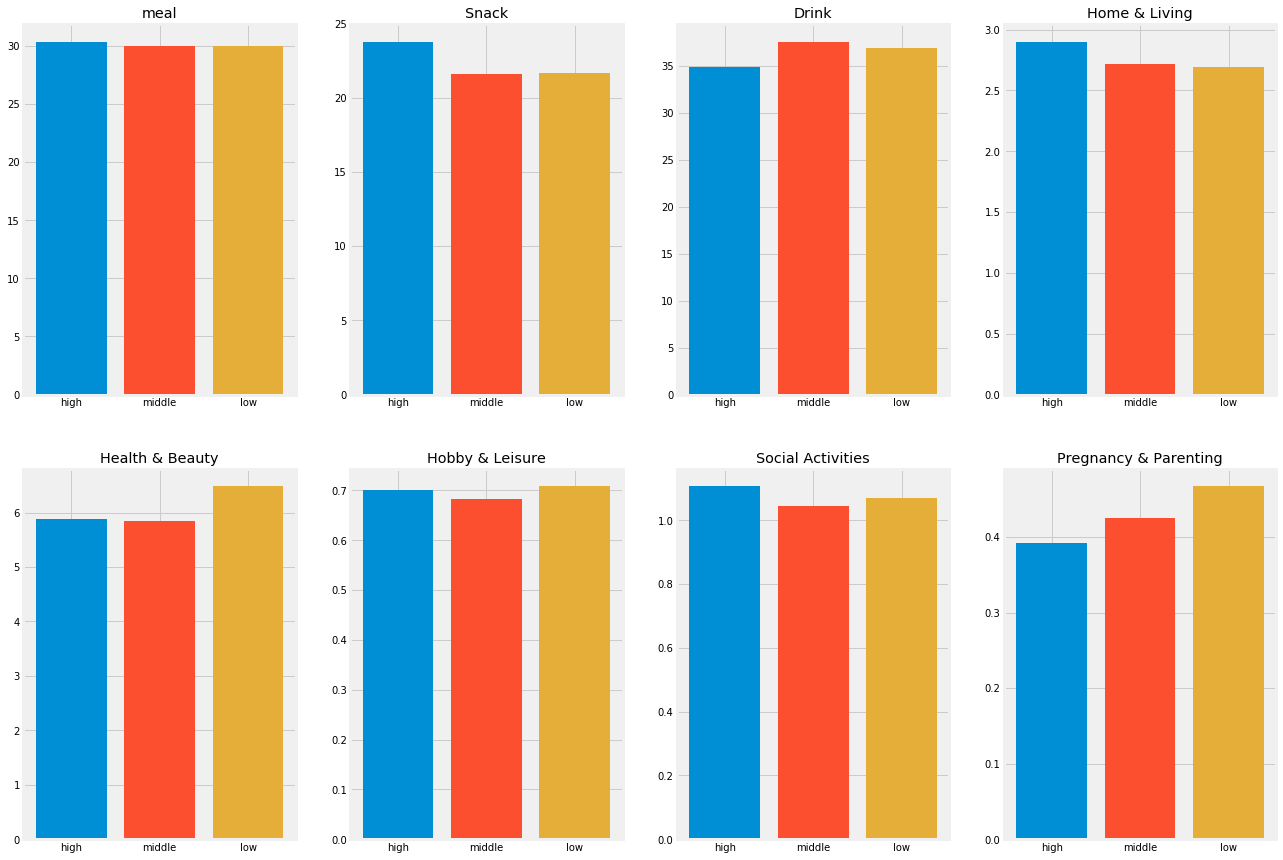

In [43]:
fn=1
plt.figure(figsize=(20,15))
for i in category_list:
    plt.subplot(2,4,fn)
    plt.bar('high',pm_high_holiday[i].mean())
    plt.bar('middle',pm_middle_holiday[i].mean())
    plt.bar('low',pm_low_holiday[i].mean())
    plt.title(i)
    fn+=1

미세먼지에 따른 카테고리별 매출 세분화 